In [1]:
import gudhi
import matplotlib.pyplot as plot
import numpy as np
from DensiTDA import alphatools 
from numpy import genfromtxt
from DensiTDA import alphatools 

In [2]:
V = np.array(genfromtxt('datasets/bunny_5000.csv', delimiter=','))
n = len(V)

In [3]:
P = np.zeros((n,1))
S = 100*V
alpha = 1
D = 4

In [4]:
# Take all the powers P and a1 
# Let R = MAX([np.sqrt(a1 + P[i]) for i in range(len(S))])
# S *= R 
# a1 *= R^2 
# P *= R^2 

# S /= R 
# a1 /= R^2 
# P /= R^2 

In [5]:
# P = [4,4,4,4,1]
# S = np.array([[1,-1,-1],[-1,1,-1],[-1,-1,1],[1,1,1],[2,2,2]])
# alpha = 100
# D = 4

In [6]:
my_alpha_complex = alphatools.compute_alpha_complex(S, P, alpha, D)

Generating 1-Dimensional Weighted Cech Complex


100%|█████████████████████████████████████████████| 5/5 [00:11<00:00,  2.37s/it]


	Total Edges of Cech Graph:  310690
	Highest Degree of Cech Graph:  200
	Average Degree of Cech Graph:  124.276
	Number of Connected Components:  1
Begin Computing Alpha Complex
Preprocessing Dual Matrices:  5000


100%|█████████████████████████████████████████████| 5/5 [00:03<00:00,  1.67it/s]


*********** BEGIN DIMENSION 0 ***********
	Possible Facets:  5000


100%|████████████████████████████████████| 5000/5000 [00:00<00:00, 20996.51it/s]

	Final Number of Facets:  5000
*********** BEGIN DIMENSION 1 ***********
	Possible Facets:  310690



100%|█████████████████████████████████████████████| 4/4 [00:05<00:00,  1.28s/it]


	Final Number of Facets:  23830
*********** BEGIN DIMENSION 2 ***********
Estimating Number of Facets for dimension  2
	Possible Facets:  32593


100%|██████████████████████████████████| 32593/32593 [00:02<00:00, 15852.46it/s]


	Final Number of Facets:  29995
*********** BEGIN DIMENSION 3 ***********
Estimating Number of Facets for dimension  3
	Possible Facets:  40731


100%|██████████████████████████████████| 40731/40731 [00:02<00:00, 15290.89it/s]

	Final Number of Facets:  11163
*********** BEGIN DIMENSION 4 ***********
Estimating Number of Facets for dimension  4
	Possible Facets:  0
	Final Number of Facets:  0


In [7]:
filtration = []
for d in range(D + 1):
    filtration += my_alpha_complex[d]

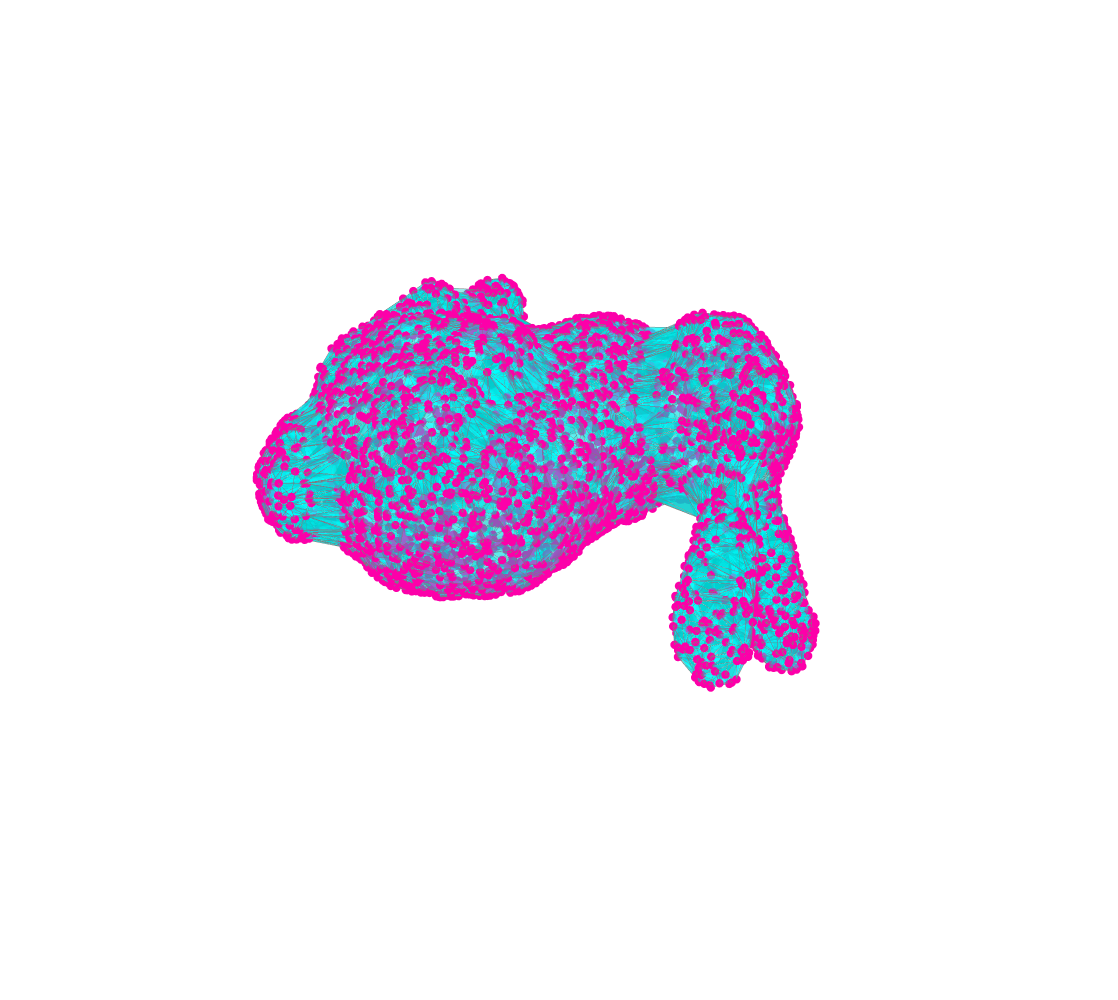

In [12]:
alphatools.draw_alpha_complex(my_alpha_complex, S, alpha, draw_points = True, draw_edges = True, draw_surfaces = True)

In [9]:
example2 = gudhi.SimplexTree()
for d in range(D + 1):
    for facet, val in my_alpha_complex[d]:
        example2.insert(facet, filtration=val)

/var/folders/tr/3zw9td7531z0_hhwc8105rv00000gn/T/ipykernel_25312/870867512.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



In [10]:
my_persistence = example2.persistence(homology_coeff_field = 2)

betti_numbers = {}
for i in range(D):
    betti_numbers[i] = 0
for bar, bd in my_persistence:
    if bd[1] > 10000: 
        betti_numbers[bar] += 1

print("Betti Numbers up to Dimension 3 over the field F_2")
betti_numbers

Betti Numbers up to Dimension 3 over the field F_2


{0: 1, 1: 0, 2: 1, 3: 0}

/opt/anaconda3/envs/densitda/lib/python3.10/site-packages/gudhi/persistence_graphical_tools.py:105: UserWarning:

This function is not available.
ModuleNotFoundError: No module named 'matplotlib'.



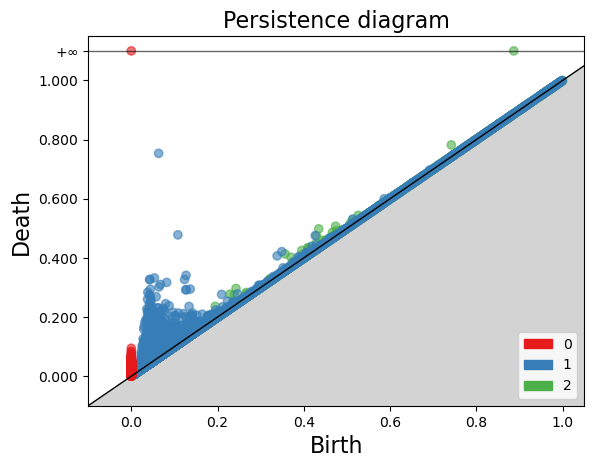

In [11]:
gudhi.plot_persistence_diagram(my_persistence, legend=True)
plot.show()